## European Population Forecasts from 2022-2025

In [74]:
# Importing Libraries

import numpy as np
import pandas as pd
import os

# Library for copying

import copy

# Importing Libraries for Plotting

import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries for Time Series Analysis

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Importing Libraries for Preprocessing, Modelling and Evaluation

from sklearn import preprocessing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [75]:
# Identifying current directory

current_directory = os.getcwd()
print(current_directory)

/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Notebooks


In [76]:
# Changing current directory to the path consisting Datasets

os.chdir("/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Datasets")

## Data Preparation

In [77]:
## Importing Population dataset

Population = pd.read_csv("Meat Production and Consumption/FAOSTAT_European_Population_1990_2021.csv")
Population.drop(Population[Population['Element Code'] != 511].index, inplace = True) #Keeping only the data for Total Population
Population.drop(Population[Population['Area'] == 'Holy See'].index, inplace = True) # Removing Data for countries not in European region to ensure consistency
Population.drop(Population[Population['Area'] == 'Gibraltar'].index, inplace = True)  # Removing Data for countries not in European region to ensure consistency
Population.drop(Population[Population['Area'] == 'Isle of Man'].index, inplace = True)  # Removing Data for countries not in European region to ensure consistency
Population.drop(Population[Population['Area'] == 'Liechtenstein'].index, inplace = True)  # Removing Data for countries not in European region to ensure consistency
Population.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,8,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1990,1990,1000 No,3295.066,X,Figure from international organizations,NaN
5,OA,Annual population,8,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1991,1991,1000 No,3302.081,X,Figure from international organizations,NaN
10,OA,Annual population,8,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1992,1992,1000 No,3303.739,X,Figure from international organizations,NaN
15,OA,Annual population,8,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1993,1993,1000 No,3300.711,X,Figure from international organizations,NaN
20,OA,Annual population,8,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1994,1994,1000 No,3293.999,X,Figure from international organizations,NaN


In [78]:
# Checking the Countries present in the Population Dataset

Population['Area'].unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Montenegro', 'Netherlands (Kingdom of the)', 'North Macedonia',
       'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'San Marino', 'Serbia', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland'],
      dtype=object)

In [79]:
Pop = Population.groupby(['Year']).Value.sum().reset_index() # Retreiving Population (in thousands) for the entire European region
Pop

,Year,Value
0,1990,448805.382
1,1991,450298.107
2,1992,688358.946
3,1993,705070.033
4,1994,705611.100
5,1995,705768.653
6,1996,705842.588
7,1997,705880.858
8,1998,705845.172
9,1999,705683.958


In [80]:
Pop['Year'] = pd.to_datetime(Pop['Year'], format = '%Y').dt.strftime('%Y') ## Changing Year to datetime type
Pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    32 non-null     object 
 1   Value   32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 640.0+ bytes


In [81]:
df = copy.deepcopy(Pop)
df.tail()

,Year,Value
27,2017,742397.863
28,2018,743326.771
29,2019,744177.750
30,2020,744227.517
31,2021,743182.596


In [82]:
df.set_index('Year', inplace = True)
df.tail()

,Value
Year,
2017,742397.863
2018,743326.771
2019,744177.750
2020,744227.517
2021,743182.596


In [83]:
# Data Description

Pop.describe()

,Value
count,32.000000
mean,707232.594688
std,69331.297805
min,448805.382000
25%,705844.526000
50%,723054.896000
75%,738151.155000
max,744227.517000


In [84]:
# Changing current directory to the path consisting Notebooks

os.chdir("/Users/suparnaroy/Library/CloudStorage/GoogleDrive-roysuparna.sr@gmail.com/Other computers/My Laptop/All about Manchester/My Course/Dissertation/Notebooks")

### Exploratory Data Analysis (EDA)

/Users/suparnaroy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


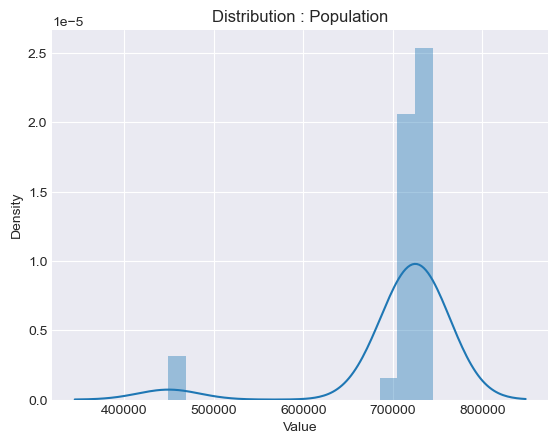

In [85]:
sns.distplot(Pop['Value']);
plt.title('Distribution : Population')
plt.savefig("Figures/Population_distribution.svg")

/Users/suparnaroy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

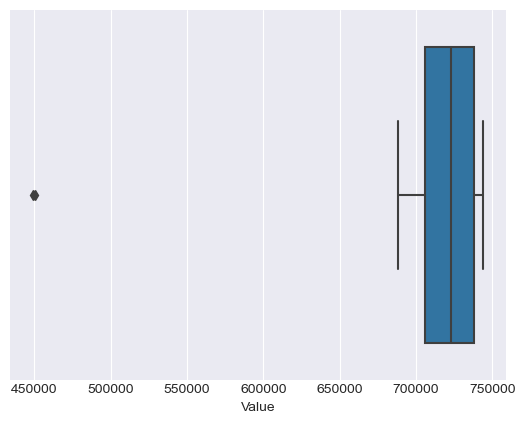

In [86]:
sns.boxplot(Pop['Value'])

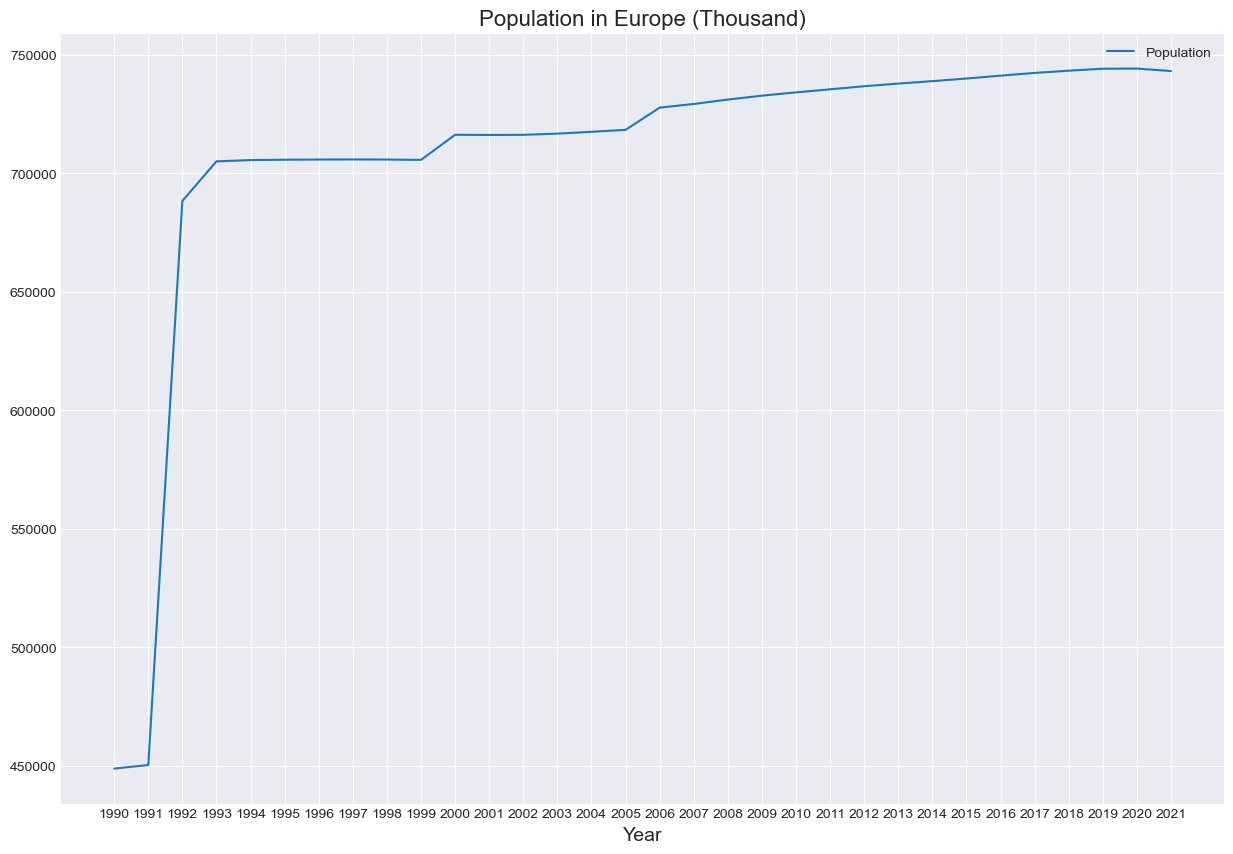

In [87]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (15, 10))
plt.xlabel('Year', fontsize = 14)

plt.plot(Pop['Year'], Pop['Value'], label = 'Population')

plt.title('Population in Europe (Thousand)', fontsize = 16)
plt.legend() 
plt.show()  

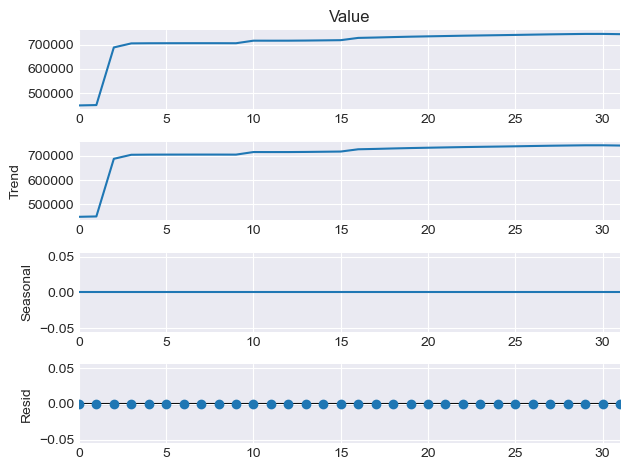

In [88]:
pop_dec = sm.tsa.seasonal_decompose(Pop['Value'], model = 'additive', period = 1) # Decompose using Additive Model
pop_dec.plot()
plt.savefig("Figures/Pop_decompose.eps", dpi = 300)
plt.show()

In [89]:
Pop.set_index('Year', inplace = True)
Pop.tail()

,Value
Year,
2017,742397.863
2018,743326.771
2019,744177.750
2020,744227.517
2021,743182.596


### ADF test is conducted with the following assumptions:

Null Hypothesis (H0): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(H1): Series is stationary, or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(H0)

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(H0), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [90]:
def run_adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

In [91]:
def tsplot(y, series_name = None, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_xlabel('Years')  # Adding x label
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        acf_ax.set_xlabel('Lags')  # Adding x label to ACF plot
        acf_ax.set_ylabel('ACF') 
        smt.graphics.plot_pacf(y, lags = 5, ax=pacf_ax, method='ywm')
        pacf_ax.set_xlabel('Lags')  # Adding x label to PACF plot
        pacf_ax.set_ylabel('Partial ACF') 
        plt.savefig(f"Figures/TS_Analysis_{series_name}.svg")
        plt.tight_layout()
        plt.show()

ARIMA model is a combination of 3 models :

AR (p) : Auto Regressive

I (d) : Integrated

MA (q) : Moving Average

(p,d,q) is known as the order of the ARIMA model. Values of these parameters are based on the above mentioned models.


p : Number of auto regressive terms.

d : Number of differencing orders required to make the time series stationary.

q : Number of lagged forecast errors in the prediction equation.

Selection criteria for the order of ARIMA model :


p : Lag value where the Partial Autocorrelation (PACF) graph cuts off or drops to 0 for the 1st instance.

d : Number of times differencing is carried out to make the time series stationary.

q : Lag value where the Autocorrelation (ACF) graph crosses the upper confidence interval for the 1st instance.

Results of Dickey-Fuller Test:
Test Statistic                 -1.896922
p-value                         0.333511
#Lags Used                      6.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


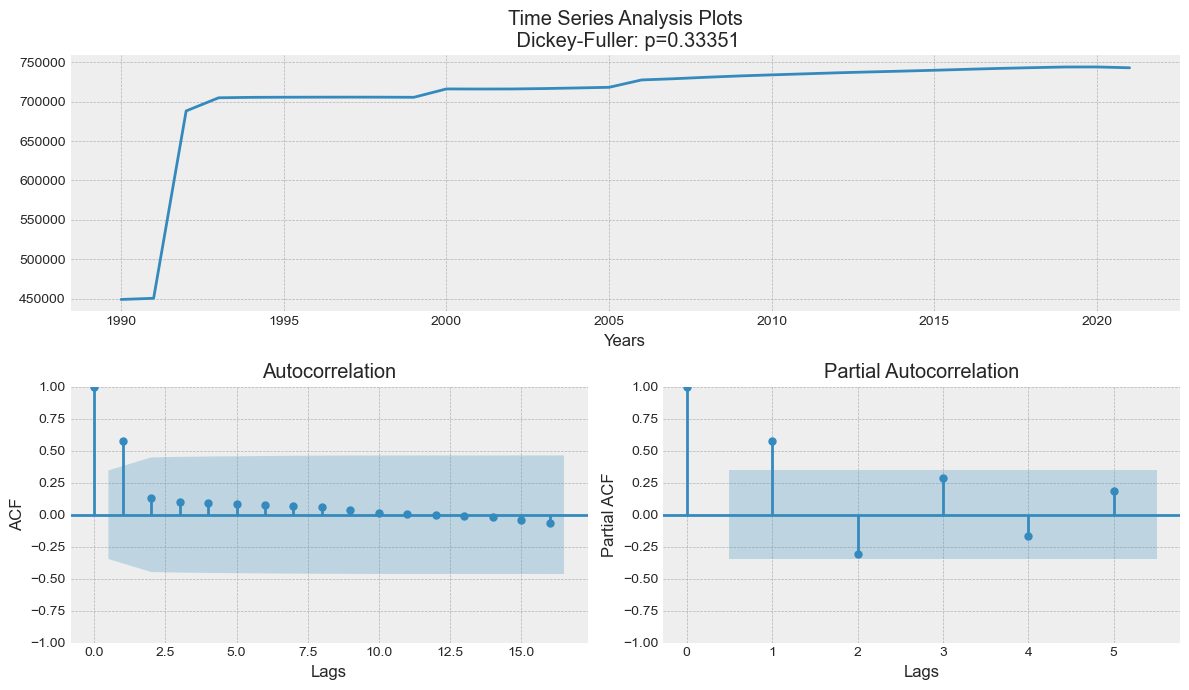

In [92]:
## ADF Test and Time Series Plots for Population

run_adf_test(Pop['Value'])
tsplot(Pop['Value'], series_name = 'Population')

ADF test gives p-value as 0.333511, i.e., >0.05 which means, we accept the null hypothesis stating that the series is non-stationary. The test statistic > Critical Values. Thus, Time Series for Population is non-stationary. 

In [93]:
Pop.reset_index(inplace = True)
Pop.tail()

,Year,Value
27,2017,742397.863
28,2018,743326.771
29,2019,744177.750
30,2020,744227.517
31,2021,743182.596


In [94]:
# To remove stationarity we difference population values once and run ADF test again

Pop['Pop_diff'] = Pop['Value'].diff().dropna()
Pop.head()

,Year,Value,Pop_diff
0,1990,448805.382,NaN
1,1991,450298.107,1492.725
2,1992,688358.946,238060.839
3,1993,705070.033,16711.087
4,1994,705611.100,541.067


In [95]:
# Removing the row with NaN due to differencing
Pop.drop(Pop.loc[Pop['Year'] == '1990'].index, inplace= True)

In [96]:
Pop.set_index('Year', inplace = True)
Pop.tail()

,Value,Pop_diff
Year,,
2017,742397.863,1147.901
2018,743326.771,928.908
2019,744177.750,850.979
2020,744227.517,49.767
2021,743182.596,-1044.921


Results of Dickey-Fuller Test:
Test Statistic                 -3.121232
p-value                         0.025021
#Lags Used                      5.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


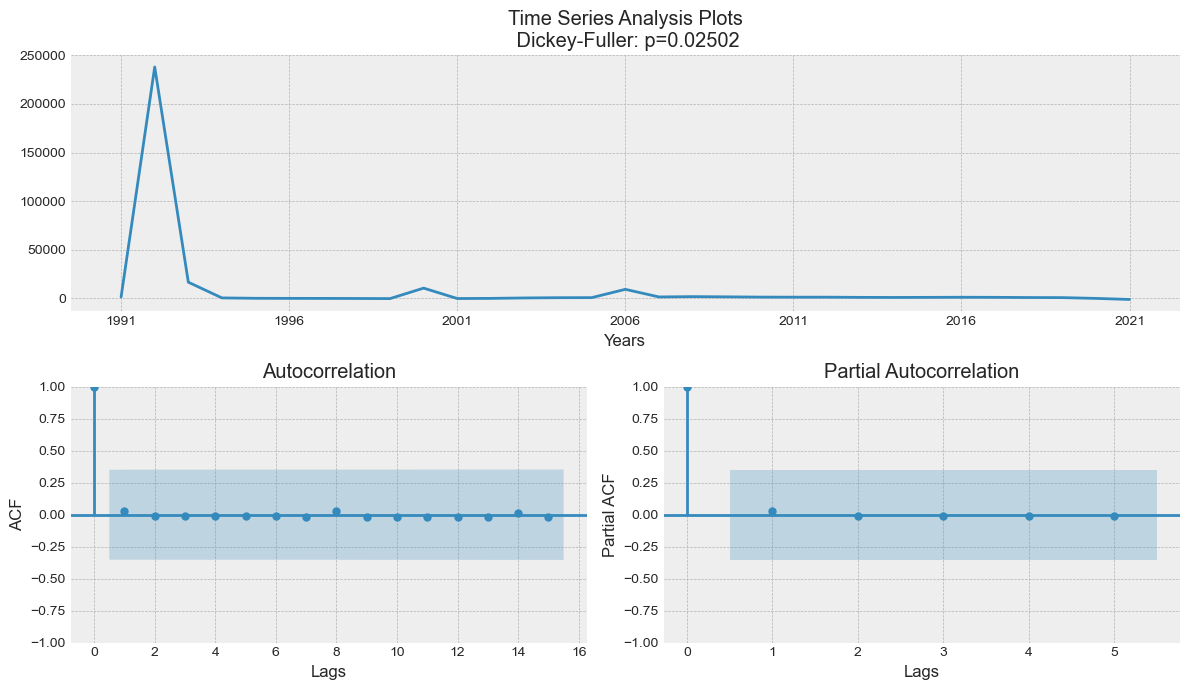

In [97]:
## ADF Test and Time Series Plots for Population series differenced once

run_adf_test(Pop['Pop_diff'])
tsplot(Pop['Pop_diff'], series_name = 'Differenced Population')

ADF test gives p-value as 0.025021, i.e., <0.05 which means, we reject the null hypothesis stating that the series is stationary. The test statistic < Critical Values except Critical Value (1%). Thus, Time Series for Population is stationary. However, since the test statistic is not more negative than the critical value at 1%, stationarity cannot be asserted with 99% confidence.

## Data Modelling: ARIMA (p=1, d=1, q=1)

In [98]:
# Splitting data into training and testing sets
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Standardizing the data

scaler = preprocessing.StandardScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# print(train_scaled)
# print(test_scaled)

In [99]:
# Fit ARIMA model
model = ARIMA(train_scaled, order=(1,1,1))
model_fit = model.fit()

# Model Summary
print(model_fit.summary())

# AIC
print(f"AIC: {model_fit.aic}")

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test_scaled, forecast))
mae = mean_absolute_error(test_scaled, forecast)
mape = np.mean(np.abs(test_scaled - forecast) / np.abs(test_scaled)) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -23.923
Date:                Sat, 02 Sep 2023   AIC                             53.847
Time:                        15:10:03   BIC                             57.381
Sample:                             0   HQIC                            54.784
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2117     42.420     -0.005      0.996     -83.354      82.931
ma.L1          0.2869     37.569      0.008      0.994     -73.348      73.921
sigma2         0.4297      0.079      5.408      0.0

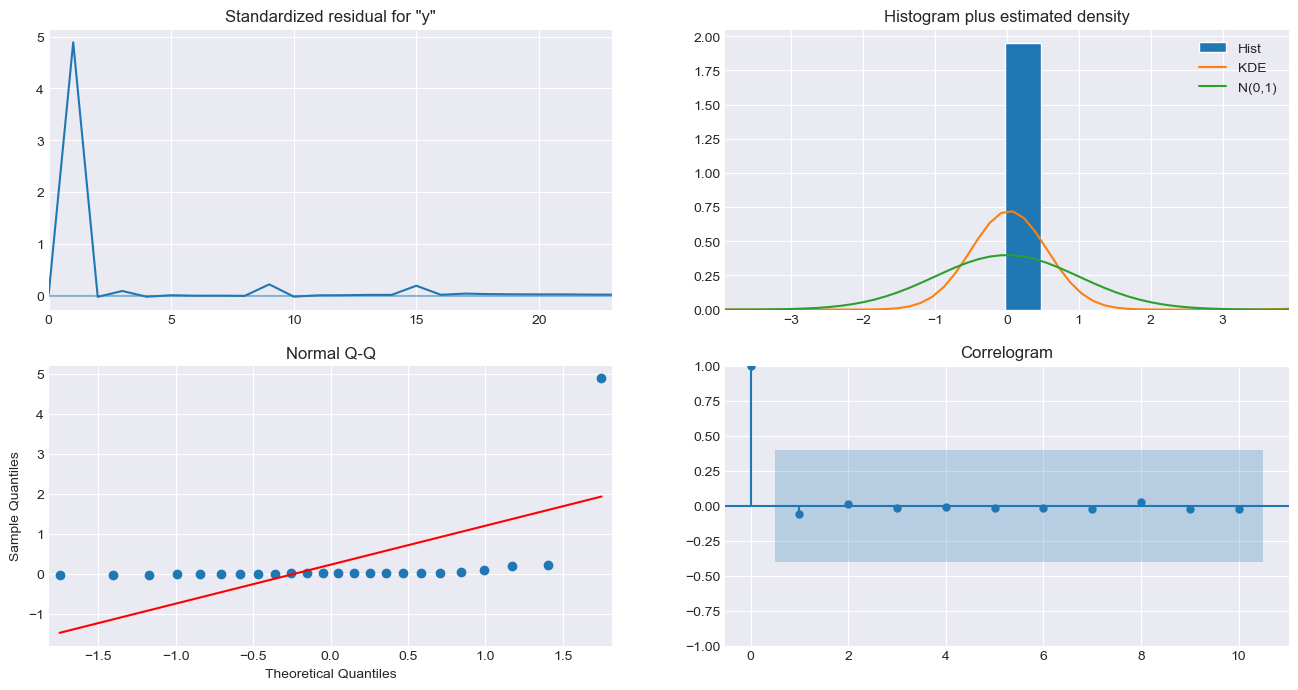

In [100]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [101]:
# Convert forecast back to original scale
forecast_inversed = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast_inversed

array([[738980.93550688],
       [738968.33206307],
       [738971.00065798],
       [738970.43562203],
       [738970.55526013],
       [738970.52992851],
       [738970.53529211]])

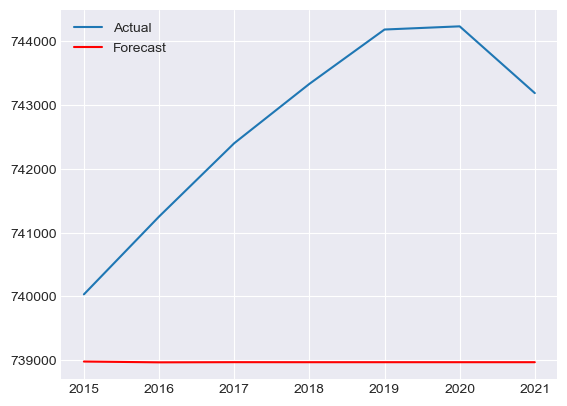

In [102]:
# Plot actual vs predicted
plt.plot(test.index, test['Value'], label="Actual")
plt.plot(test.index, forecast_inversed, label="Forecast", color="red")
plt.legend()
plt.show()

#### Retraining the model with the entire dataset to predict Population values from 2022 through 2025

In [103]:
# Standardizing the data

scaler = preprocessing.StandardScaler()

df_scaled = scaler.fit_transform(df)

In [104]:
# Fit ARIMA model
model = ARIMA(df_scaled, order=(1,1,1))
model_fit = model.fit()

# AIC
print(f"AIC: {model_fit.aic}")

# Forecast
forecast = model_fit.forecast(steps=4)

AIC: 65.08686115365171


In [105]:
# Convert forecast back to original scale
forecast_inversed = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast_inversed

array([[743106.74658185],
       [743125.07561779],
       [743120.64640044],
       [743121.71672222]])

In [106]:
# Converting the forecasts into a DataFrame

results = pd.DataFrame()
results['Year'] = [2022, 2023, 2024, 2025]
results['Year'] = pd.to_datetime(results['Year'], format = '%Y').dt.strftime('%Y') 
results['Value'] = forecast_inversed
# results.set_index('Year', inplace = True)
results

,Year,Value
0,2022,743106.746582
1,2023,743125.075618
2,2024,743120.646400
3,2025,743121.716722


In [107]:
df.reset_index(inplace = True)
df

,Year,Value
0,1990,448805.382
1,1991,450298.107
2,1992,688358.946
3,1993,705070.033
4,1994,705611.100
5,1995,705768.653
6,1996,705842.588
7,1997,705880.858
8,1998,705845.172
9,1999,705683.958


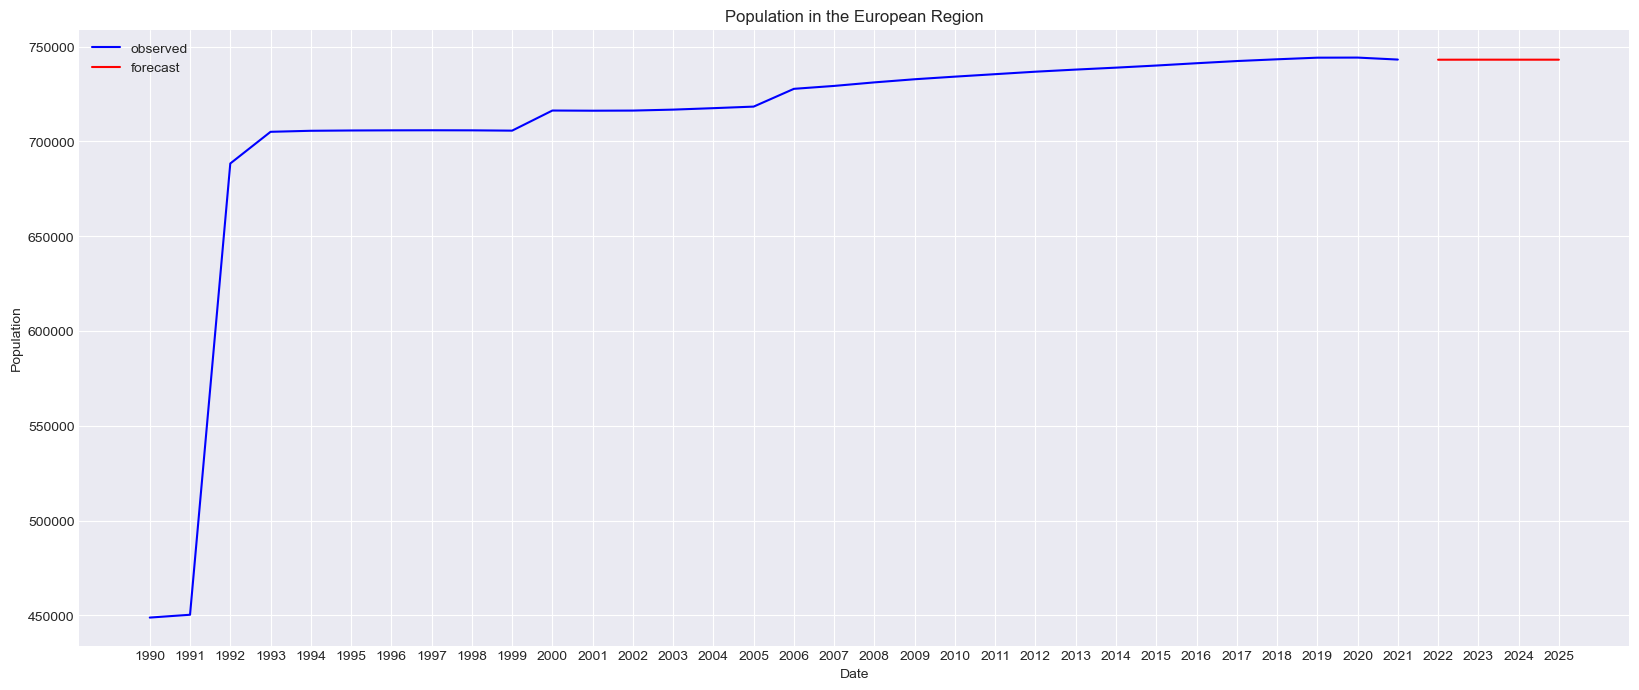

In [108]:
# Plotting Observed and ARIMA forecasts

plt.figure(figsize=(20, 8))
plt.plot(df['Year'], df['Value'], 'b-', label = 'observed')
plt.plot(results['Year'], results['Value'], 'r-', label = 'forecast')
plt.xlabel('Date'); plt.ylabel('Population'); plt.title('Population in the European Region')
plt.savefig("Figures/Pop_Forecast.eps", dpi = 300)
plt.legend();

In [109]:
df = pd.concat([df, results], ignore_index= True)
df

,Year,Value
0,1990,448805.382000
1,1991,450298.107000
2,1992,688358.946000
3,1993,705070.033000
4,1994,705611.100000
5,1995,705768.653000
6,1996,705842.588000
7,1997,705880.858000
8,1998,705845.172000
9,1999,705683.958000


In [111]:
df.to_csv("Data/Population_Forecast_ARIMA.csv")

## Data Modelling: Holt's Exponential Smoothing a.k.a., Holt's Linear Trend

In [138]:
popdf = copy.deepcopy(df)
popdf

,Year,Value
0,1990,448805.382000
1,1991,450298.107000
2,1992,688358.946000
3,1993,705070.033000
4,1994,705611.100000
5,1995,705768.653000
6,1996,705842.588000
7,1997,705880.858000
8,1998,705845.172000
9,1999,705683.958000


In [139]:
popdf.drop(popdf.loc[popdf['Year'] > '2021'].index, inplace= True) ## Removing the ARIMA forecasts from the dataframe
popdf

,Year,Value
0,1990,448805.382
1,1991,450298.107
2,1992,688358.946
3,1993,705070.033
4,1994,705611.100
5,1995,705768.653
6,1996,705842.588
7,1997,705880.858
8,1998,705845.172
9,1999,705683.958


In [140]:
popdf['Year'] = pd.to_datetime(popdf['Year'], format = '%Y').dt.strftime('%Y') ## Changing Year to datetime type
popdf.set_index('Year', inplace = True)
popdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1990 to 2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   32 non-null     float64
dtypes: float64(1)
memory usage: 512.0+ bytes


In [141]:
# Splitting data into training and testing sets
train_size = int(len(df) * 0.8)
train = popdf.iloc[:train_size]
test = popdf.iloc[train_size:]

# Standardizing the data

scaler = preprocessing.StandardScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# print(train_scaled)
# print(test_scaled)

In [142]:
# Fitting Holt's model and getting forecasts
model_holt = Holt(train_scaled, damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test_scaled))


#### Model Evaluation using RMSE, MAE and MAPE

In [143]:
rmse = np.sqrt(mean_squared_error(test_scaled, forecasts_holt))
mae = mean_absolute_error(test_scaled, forecasts_holt)
mape = np.mean(np.abs(test_scaled- forecasts_holt) / np.abs(test_scaled)) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

print(f"AIC: {model_holt.aic}")

RMSE: 0.02404836597785173
MAE: 0.023032853762763178
MAPE: 3.9327295049562156%
AIC: -28.86420333801422


In [144]:
# Getting the optimized values - alpha and phi
optimized_alpha = model_holt.params['smoothing_level']
optimized_phi = model_holt.params['damping_trend']

print("Optimized alpha:", optimized_alpha)
print("Optimized phi:", optimized_phi)

Optimized alpha: 0.5606596497238348
Optimized phi: 0.8000000000000035


In [145]:
# Converting forecast back to original scale
forecast_inversed = scaler.inverse_transform(forecasts_holt.reshape(-1, 1))
forecast_inversed

array([[741892.85641621],
       [742038.06703201],
       [742154.23552465],
       [742247.17031876]])

#### Retraining Holt's Linear Trend model with the entire dataset to predict Population values from 2022 through 2025

In [146]:
# Standardizing the data

scaler = preprocessing.StandardScaler()

df_scaled = scaler.fit_transform(popdf)

In [147]:
# Fitting Holt's model and retreiving future forecasts

model_holt = Holt(df_scaled, damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(4)

In [148]:
# Converting forecast back to original scale
forecast_inversed = scaler.inverse_transform(forecasts_holt.reshape(-1, 1))
forecast_inversed

array([[743656.39535526],
       [743715.87958867],
       [743763.4669754 ],
       [743801.53688478]])

In [149]:
# Converting the forecasts obtained into a DataFrame

resultsh = pd.DataFrame()
resultsh['Year'] = [2022, 2023, 2024, 2025]
resultsh['Year'] = pd.to_datetime(resultsh['Year'], format = '%Y').dt.strftime('%Y') 
resultsh['Value'] = forecast_inversed
# resultsh.set_index('Year', inplace = True)
resultsh

,Year,Value
0,2022,743656.395355
1,2023,743715.879589
2,2024,743763.466975
3,2025,743801.536885


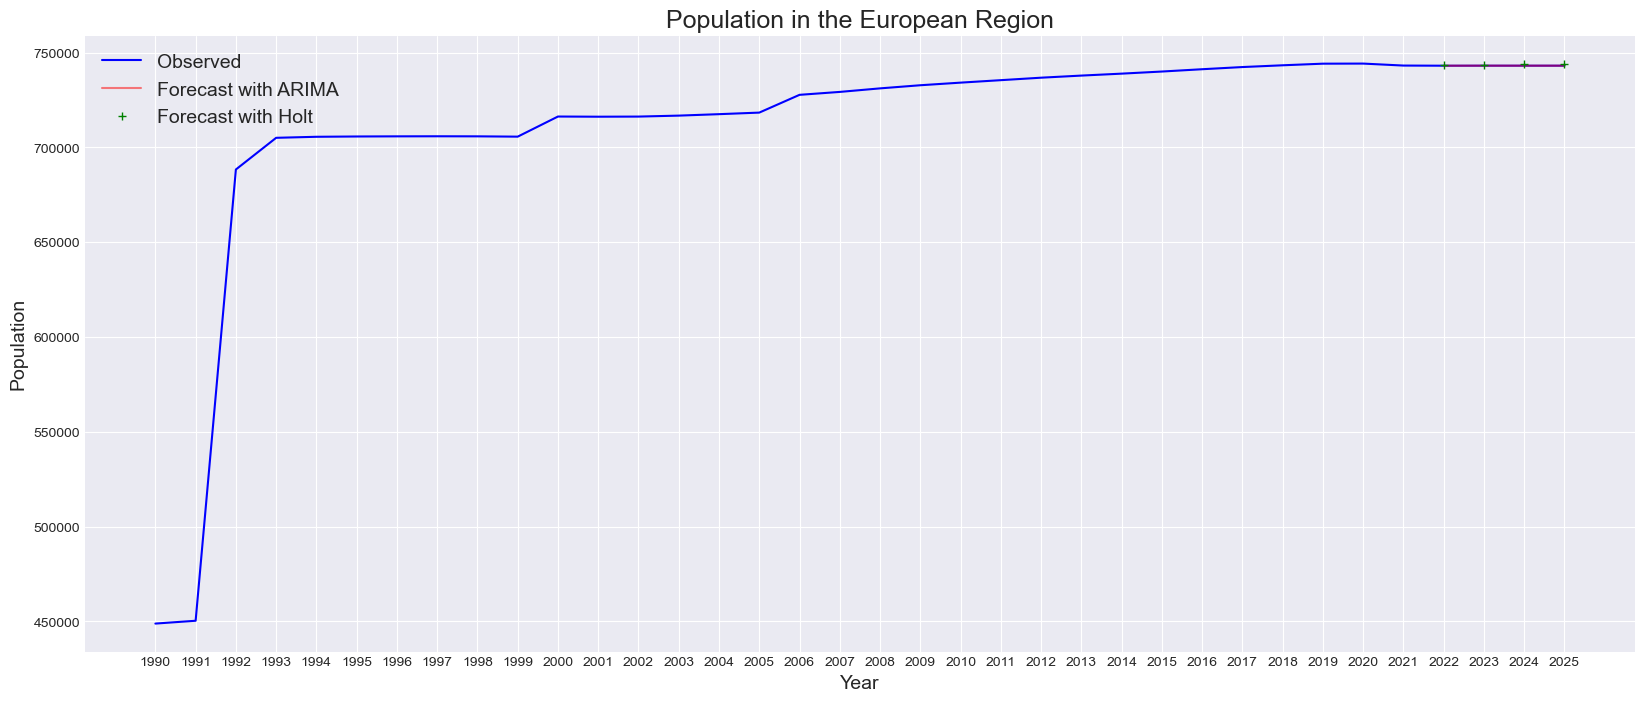

In [150]:
## Plotting the forecasts obtained by ARIMA and Holt's Linear Trend Model against the observed values

plt.figure(figsize=(20, 8))
plt.plot(df['Year'], df['Value'], 'b-', label = 'Observed')
plt.plot(results['Year'], results['Value'], 'r-', label = 'Forecast with ARIMA', alpha = 0.5)
plt.plot(resultsh['Year'], resultsh['Value'], 'g+', label = 'Forecast with Holt')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.title('Population in the European Region', fontsize = 18)
plt.legend(fontsize=14, loc ="upper left")
plt.savefig("Figures/Pop_Forecast.svg")

In [151]:
popdf.reset_index(inplace = True)
popdf

,Year,Value
0,1990,448805.382
1,1991,450298.107
2,1992,688358.946
3,1993,705070.033
4,1994,705611.100
5,1995,705768.653
6,1996,705842.588
7,1997,705880.858
8,1998,705845.172
9,1999,705683.958


In [152]:
popdf = pd.concat([popdf, resultsh], ignore_index= True) # Merging Forecasts with original DataFrame
popdf

,Year,Value
0,1990,448805.382000
1,1991,450298.107000
2,1992,688358.946000
3,1993,705070.033000
4,1994,705611.100000
5,1995,705768.653000
6,1996,705842.588000
7,1997,705880.858000
8,1998,705845.172000
9,1999,705683.958000


In [153]:
popdf.to_csv("Data/Population_Forecast_Holt.csv")